<a href="https://colab.research.google.com/github/chawonlee/AI_svm_mlp_deepmlp/blob/master/cat_and_dog_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import os
# 기본 경로
base_dir = '/content/drive/MyDrive/archive'

training_set = os.path.join(base_dir, 'training_set')
test_set = os.path.join(base_dir, 'test_set')

# 훈련에 사용되는 고양이/개 이미지 경로
training_set_cats = os.path.join(training_set, 'cats')
training_set_dogs = os.path.join(training_set, 'dogs')
print(training_set_cats)
print(training_set_dogs)

# 테스트에 사용되는 고양이/개 이미지 경로
test_set_cats = os.path.join(test_set, 'cats')
test_set_dogs = os.path.join(test_set, 'dogs')
print(test_set_cats)
print(test_set_dogs)

/content/drive/MyDrive/archive/training_set/cats
/content/drive/MyDrive/archive/training_set/dogs
/content/drive/MyDrive/archive/test_set/cats
/content/drive/MyDrive/archive/test_set/dogs


In [19]:
!pip install python-resize-image
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np

from PIL import Image
from torchvision.datasets import ImageFolder
from resizeimage import resizeimage

from skimage.feature import hog
from skimage.color import rgb2grey

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_curve, auc, accuracy_score

In [20]:
# importing images using torchvision
dataset = ImageFolder("/content/drive/MyDrive/archive/training_set")
# creating labels dataframe
imgs, labels = zip(*dataset.imgs)
imgs = list(imgs)
labels = list(labels)
labels_df = pd.DataFrame({'image': imgs, 'label':labels})
labels_df

,image,label
0,/content/drive/MyDrive/archive/training_set/ca...,1
1,/content/drive/MyDrive/archive/training_set/ca...,1
2,/content/drive/MyDrive/archive/training_set/ca...,1
3,/content/drive/MyDrive/archive/training_set/ca...,1
4,/content/drive/MyDrive/archive/training_set/ca...,1
...,...,...
8010,/content/drive/MyDrive/archive/training_set/do...,2
8011,/content/drive/MyDrive/archive/training_set/do...,2
8012,/content/drive/MyDrive/archive/training_set/do...,2
8013,/content/drive/MyDrive/archive/training_set/do...,2


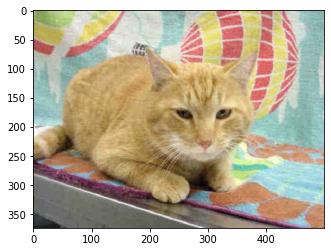

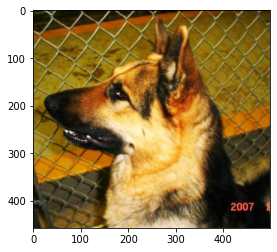

In [21]:
def get_image(path):
    img = Image.open(path)
    return np.array(img)

# showing a dog image
dog_row = labels_df[labels_df.label == 1].reset_index().image[23]
plt.imshow(get_image(dog_row))
plt.show()

# showing a cat image
cat_row = labels_df[labels_df.label == 2].reset_index().image[79]
plt.imshow(get_image(cat_row))
plt.show()

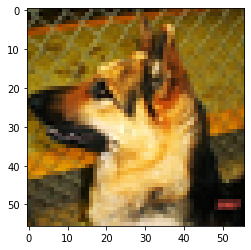

In [22]:
# image manupulation
img = Image.open(cat_row)
img = resizeimage.resize_cover(img, [56, 56])
plt.imshow(np.array(img), cmap='gray')
plt.show()

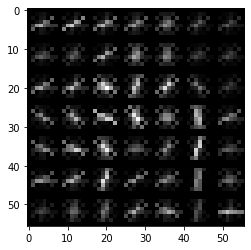

In [23]:
hog_features, hog_img = hog(img, visualize=True, block_norm='L2-Hys', pixels_per_cell=(8,8))
plt.imshow(np.array(hog_img), cmap='gray')
plt.show()

In [24]:
def create_features(path):
    img = Image.open(path)
    img = resizeimage.resize_cover(img, [56, 56])
    img_arr = np.array(img)
    # flatten three channel color image
    color_features = img_arr.flatten()
    # convert image to greyscale
    grey_image = rgb2grey(img_arr)
    # get HOG features from greyscale image
    hog_features = hog(grey_image, block_norm='L2-Hys', pixels_per_cell=(8, 8))
    # combine color and hog features into a single array
    flat_features = np.hstack((color_features, hog_features))
    return flat_features

dog_features = create_features(dog_row)
print(dog_features.shape)

(11433,)


In [25]:
def create_feature_matrix(label_df):
    features_list = []
    
    for img_path in labels_df.image:
        # get features for image
        img_features = create_features(img_path)
        features_list.append(img_features)
    
    feature_matrix = np.array(features_list)
    return feature_matrix

feature_matrix = create_feature_matrix(labels_df)

In [26]:
# get shape of feature matrix
print('Feature matrix shape is: ', feature_matrix.shape)

# define standard scaler
ss = StandardScaler()
# run this on our feature matrix
imgs_stand = ss.fit_transform(feature_matrix)

Feature matrix shape is:  (8015, 11433)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(imgs_stand,
                                                    labels_df.label.values,
                                                    test_size=0.4,
                                                    )

In [28]:
mlp = MLPClassifier(hidden_layer_sizes=(100), learning_rate_init=0.001, batch_size=32, max_iter=300, solver='adam', verbose=True)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

Iteration 1, loss = 2.33406541
Iteration 2, loss = 0.96190667
Iteration 3, loss = 0.57380911
Iteration 4, loss = 0.45619517
Iteration 5, loss = 0.27039642
Iteration 6, loss = 0.18942712
Iteration 7, loss = 0.12564166
Iteration 8, loss = 0.11564342
Iteration 9, loss = 0.09508841
Iteration 10, loss = 0.15492576
Iteration 11, loss = 0.23615107
Iteration 12, loss = 0.09752536
Iteration 13, loss = 0.05758144
Iteration 14, loss = 0.12823720
Iteration 15, loss = 0.09688818
Iteration 16, loss = 0.08061445
Iteration 17, loss = 0.07396918
Iteration 18, loss = 0.14376429
Iteration 19, loss = 0.09976871
Iteration 20, loss = 0.05661372
Iteration 21, loss = 0.04110969
Iteration 22, loss = 0.02617094
Iteration 23, loss = 0.01949224
Iteration 24, loss = 0.00434429
Iteration 25, loss = 0.00334990
Iteration 26, loss = 0.00239869
Iteration 27, loss = 0.00224116
Iteration 28, loss = 0.00214459
Iteration 29, loss = 0.00206910
Iteration 30, loss = 0.00201187
Iteration 31, loss = 0.00196064
Iteration 32, los

In [29]:
# calculate accuracy
accuracy = accuracy_score(y_pred, y_test)
print('mlp 정확률 : ', accuracy*100)

mlp 정확률 :  70.27448533998752


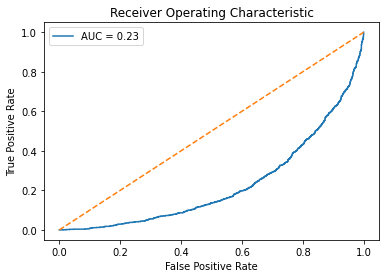

In [32]:
# predict probabilities for X_test using predict_proba
probabilities = mlp.predict_proba(X_test)

# select the probabilities for label 1.0
y_proba = probabilities[:, 1]

# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba, pos_label=1)

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

In [ ]:
from random import randint

test = ImageFolder("/content/drive/MyDrive/archive/test_set")
imgs, labels = zip(*test.imgs)
imgs = list(imgs)
labels = list(labels)

In [ ]:
random_ix = randint(0, len(imgs))
label = {1: 'Cat', 2:'Dog'}
rand_img = imgs[random_ix]
# create features of the image
test_features = create_features(rand_img)
# predict
prediction = mlp.predict([test_features])
print("예측: " + label[prediction[0]])
print("실제: " + label[labels[random_ix]])
# display image
display(Image.open(rand_img))